
# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
skipRandom = True

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
skipRandom = True
if not skipRandom:
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        print("scores: {}".format(scores))
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
if not skipRandom:
    env.close()


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from ddpg_agent import *
def train_ddpg(batch_size, buffer_size, use_batch_norm, random_fn, num_episodes):
    agent = Agent(numAgents = num_agents, 
                  state_size=state_size, 
                  action_size=action_size, 
                  random_seed=47,
                  batch_size = batch_size,
                  buffer_size = buffer_size,
                  use_batch_norm = use_batch_norm,
                  random_fn = random_fn)
    
    
    scores = []
    PRINT_EVERY=1
    for episode in range(num_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()

        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            score += np.array(rewards)
            states = next_states
            if np.any(dones):
                break
        if episode % PRINT_EVERY == 0:
            print("Episode {} Min/Avg/Max {:.4E}/{:.4E}/{:.4E}".format(
                episode, np.min(score), np.mean(score), np.max(score)))
        scores.append(np.mean(score))
    return scores, agent

In [10]:
import random
import time
import pickle
import torch
import numpy as np

skipThis = True
if not skipThis:
    for batch_size in [32]:
        for buffer_size in [100000,1000000]:
            for use_batch_norm in [False,True]:
                for random_fn, fn_name in [(np.random.randn, 'normal')]:
                    start_time = time.time()
                    scores, agent = train_ddpg(batch_size,
                                       buffer_size,
                                       use_batch_norm,
                                       random_fn,
                                       50)
                    end_time = time.time()
                    fname_suffix = '{}_{}_{}_{}'.format(batch_size, buffer_size, use_batch_norm, fn_name)
                    fname = 'time_and_scores_{}.pkl'.format(fname_suffix)
                    pickle.dump((end_time-start_time, scores), open(fname, 'wb'))
                    torch.save(agent.actor_local.state_dict(), './actor_{}.pt'.format(fname_suffix))
                    torch.save(agent.critic_local.state_dict(), './critic_{}.pt'.format(fname_suffix))
                
                
                

In [11]:
start_time = time.time()
batch_size = 128
buffer_size = 1000000
use_batch_norm = True
fn_name = 'normal'
fname_suffix = '{}_{}_{}_{}'.format(batch_size, buffer_size, use_batch_norm, fn_name)

scores, agent = train_ddpg(batch_size,buffer_size,use_batch_norm,np.random.randn, 300)
end_time = time.time()
fname = 'time_and_scores_{}_official.pkl'.format(fname_suffix)

pickle.dump((end_time-start_time, scores), open(fname, 'wb'))
torch.save(agent.actor_local.state_dict(), './actor_{}_official.pt'.format(fname_suffix))
torch.save(agent.critic_local.state_dict(), './critic_{}_official.pt'.format(fname_suffix))

Episode 0 Min/Avg/Max 0.0000E+00/6.5500E-02/5.4000E-01
Episode 1 Min/Avg/Max 3.0000E-02/5.6000E-01/1.3400E+00
Episode 2 Min/Avg/Max 2.0000E-02/7.4800E-01/1.9400E+00
Episode 3 Min/Avg/Max 7.0000E-02/9.9550E-01/2.3000E+00
Episode 4 Min/Avg/Max 2.9000E-01/8.6150E-01/2.3300E+00
Episode 5 Min/Avg/Max 1.0000E-01/7.4800E-01/1.3200E+00
Episode 6 Min/Avg/Max 9.0000E-02/7.2150E-01/1.7800E+00
Episode 7 Min/Avg/Max 2.0000E-01/6.7050E-01/1.3300E+00
Episode 8 Min/Avg/Max 1.9000E-01/8.1100E-01/2.1400E+00
Episode 9 Min/Avg/Max 0.0000E+00/8.0200E-01/1.4100E+00
Episode 10 Min/Avg/Max 3.0000E-01/1.1950E+00/2.6500E+00
Episode 11 Min/Avg/Max 0.0000E+00/1.3235E+00/3.5500E+00
Episode 12 Min/Avg/Max 4.1000E-01/1.1895E+00/2.5400E+00
Episode 13 Min/Avg/Max 5.5000E-01/1.5605E+00/2.2200E+00
Episode 14 Min/Avg/Max 8.4000E-01/1.7370E+00/3.0100E+00
Episode 15 Min/Avg/Max 3.1000E-01/1.1680E+00/1.9600E+00
Episode 16 Min/Avg/Max 6.0000E-02/1.2890E+00/2.3800E+00
Episode 17 Min/Avg/Max 5.1000E-01/1.5280E+00/4.0500E+00
Ep

Episode 146 Min/Avg/Max 2.5660E+01/3.3552E+01/3.7730E+01
Episode 147 Min/Avg/Max 2.8650E+01/3.4613E+01/3.8540E+01
Episode 148 Min/Avg/Max 3.3050E+01/3.5167E+01/3.7330E+01
Episode 149 Min/Avg/Max 1.9800E+01/3.2705E+01/3.7280E+01
Episode 150 Min/Avg/Max 2.8370E+01/3.5833E+01/3.8690E+01
Episode 151 Min/Avg/Max 2.8380E+01/3.4414E+01/3.8100E+01
Episode 152 Min/Avg/Max 2.5810E+01/3.3573E+01/3.7340E+01
Episode 153 Min/Avg/Max 2.4940E+01/3.2297E+01/3.6100E+01
Episode 154 Min/Avg/Max 3.1640E+01/3.5191E+01/3.7910E+01
Episode 155 Min/Avg/Max 2.8340E+01/3.2633E+01/3.6710E+01
Episode 156 Min/Avg/Max 2.8640E+01/3.3764E+01/3.7350E+01
Episode 157 Min/Avg/Max 2.7990E+01/3.4350E+01/3.9550E+01
Episode 158 Min/Avg/Max 2.6170E+01/3.3082E+01/3.8530E+01
Episode 159 Min/Avg/Max 3.0450E+01/3.5137E+01/3.7640E+01
Episode 160 Min/Avg/Max 3.1940E+01/3.5542E+01/3.7790E+01
Episode 161 Min/Avg/Max 2.7070E+01/3.4119E+01/3.7370E+01
Episode 162 Min/Avg/Max 2.7540E+01/3.5375E+01/3.7880E+01
Episode 163 Min/Avg/Max 3.0170E

Episode 290 Min/Avg/Max 2.8860E+01/3.2479E+01/3.5510E+01
Episode 291 Min/Avg/Max 3.1250E+01/3.4989E+01/3.8100E+01
Episode 292 Min/Avg/Max 3.3850E+01/3.5908E+01/3.8340E+01
Episode 293 Min/Avg/Max 3.3410E+01/3.5801E+01/3.7300E+01
Episode 294 Min/Avg/Max 2.8820E+01/3.4263E+01/3.8160E+01
Episode 295 Min/Avg/Max 2.8240E+01/3.4437E+01/3.6860E+01
Episode 296 Min/Avg/Max 3.2400E+01/3.4784E+01/3.6840E+01
Episode 297 Min/Avg/Max 3.3890E+01/3.6343E+01/3.8550E+01
Episode 298 Min/Avg/Max 3.2360E+01/3.5609E+01/3.7370E+01
Episode 299 Min/Avg/Max 3.6390E+01/3.8057E+01/3.9460E+01


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
all_scores = []
for batch_size in [64,128,256]:
    for buffer_size in [100000,1000000]:
        for use_batch_norm in ["False", "True"]:
            for random_fn in ["uniform", "normal"]:
                fname = 'time_and_scores_{batch_size}_{buffer_size}_{use_batch_norm}_{random_fn}.pkl'.format(
                    batch_size=batch_size, buffer_size=buffer_size, use_batch_norm=use_batch_norm, random_fn=random_fn)
                time_and_scores = pickle.load(open(fname, 'rb'))
                epoch = 0
                for s in time_and_scores[1]:
                    all_scores.append((fname, batch_size, buffer_size, use_batch_norm, random_fn, epoch, s))     
                    epoch += 1

In [3]:
sns.set()

In [34]:
df=pd.DataFrame(data=all_scores)

In [35]:
df.head()

,0,1,2,3,4,5,6
0,time_and_scores_64_100000_False_uniform.pkl,64,100000,False,uniform,0,0.806
1,time_and_scores_64_100000_False_uniform.pkl,64,100000,False,uniform,1,0.614
2,time_and_scores_64_100000_False_uniform.pkl,64,100000,False,uniform,2,0.631
3,time_and_scores_64_100000_False_uniform.pkl,64,100000,False,uniform,3,0.616
4,time_and_scores_64_100000_False_uniform.pkl,64,100000,False,uniform,4,0.366


In [37]:
df.columns=['fname', 'batch_size', 'buffer_size', 'use_batch_norm', 'random_fn', 'epoch', 'score']

In [70]:
df_with_batch_norm = df[df.use_batch_norm == 'True']
df_no_batch_norm = df[df.use_batch_norm == 'False']

In [120]:
def display_conditional_performance(df, conditions, labels, title=""):
    my_df_scores = {}
    for i in range(len(labels)):
        cond_field, cond_value = conditions[i]
        label = labels[i]
        my_df = df[df[cond_field] == cond_value]
        my_df_scores[label] = []
        for epoch in range(50):
            my_df_scores[label].append(np.mean(my_df.score[my_df.epoch == epoch]))
    g=sns.relplot(data=pd.DataFrame(my_df_scores))
    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=.9)

    

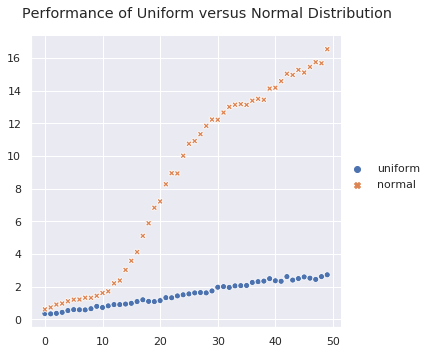

In [121]:
display_conditional_performance(df, 
                                [['random_fn','uniform'],['random_fn','normal']], 
                                ['uniform','normal'], 
                                "Performance of Uniform versus Normal Distribution")

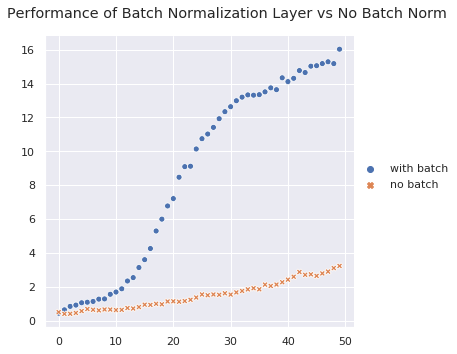

In [122]:
display_conditional_performance(df,
                                [['use_batch_norm','True'], ['use_batch_norm', 'False']], 
                                ['with batch','no batch'],
                               "Performance of Batch Normalization Layer vs No Batch Norm")

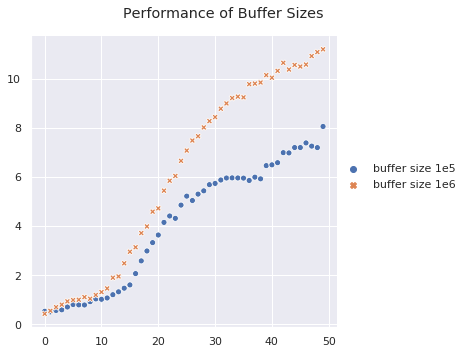

In [124]:
display_conditional_performance(df, 
                                [['buffer_size',100000],['buffer_size',1000000]], 
                                ['buffer size 1e5','buffer size 1e6'],
                               "Performance of Buffer Sizes")

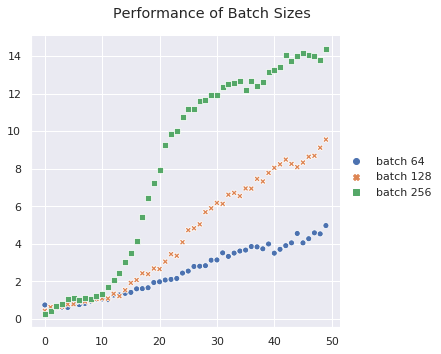

In [125]:
display_conditional_performance(df, 
                                [['batch_size',64],['batch_size',128], 
                                 ['batch_size',256]], 
                                ['batch 64','batch 128','batch 256'],
                               "Performance of Batch Sizes")

In [126]:
time_and_scores = pickle.load(open('time_and_scores_128_1000000_True_normal_official.pkl', 'rb'))


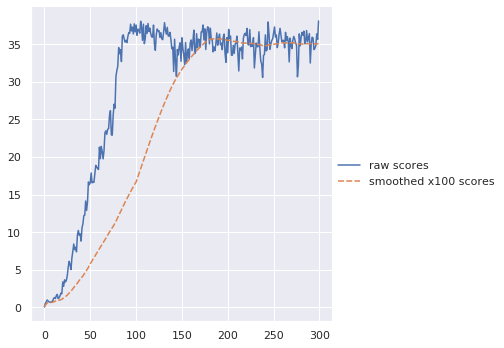

In [160]:
scores = time_and_scores[1]
d = {'raw scores':scores, 'smoothed x100 scores':[]}
d['smoothed x100 scores'] = [np.mean(scores[max(i-100,0):i+1]) for i in range(len(scores))]
pdf = pd.DataFrame(d)
ax=sns.relplot(data=pdf,kind='line')

In [167]:
print("Smoothed Score exceeded 30 at {}".format(pdf.index[pdf['smoothed x100 scores'] > 30][0]))

Smoothed Score exceeded 30 at 142
